# Analyse du jeu de données `usagers-2021.csv`

Ce notebook examine le jeu de données `usagers-2021.csv`. Nous allons explorer la structure des données, identifier les problèmes tels que les valeurs manquantes et les valeurs aberrantes, et générer des statistiques descriptives et des visualisations pour mieux comprendre le jeu de données.

## Table des matières
1. [Importation des bibliothèques](#importation-des-bibliothèques)
2. [Chargement des données](#chargement-des-données)
3. [Examen des données](#examen-des-données)
4. [Identification des valeurs manquantes](#identification-des-valeurs-manquantes)
5. [Statis descriptives](#Statis-descriptives)
6. [Identification des valeurs aberrantes](#identification-des-valeurs-aberrantes)
7. [Visualisation des données](#visualisation-des-données)
8. [Conclusion](#conclusion)

## 1. Importation des bibliothèques



In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

#options de visualisation
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

## 2. Chargement des données

In [2]:
directory_path = os.path.dirname(os.path.abspath('')) 

file_path = os.path.join(directory_path, 'data', 'usagers-2021.csv')
usagers_df = pd.read_csv(file_path)

usagers_df.head()

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202100000001,201 764,B01,1,1,3,1,2000.0,1,0,9,-1,0,0,-1
1,202100000001,201 765,A01,1,1,1,1,1978.0,1,1,-1,-1,0,0,-1
2,202100000002,201 762,A01,1,1,4,1,1983.0,0,1,-1,-1,0,0,-1
3,202100000002,201 763,B01,1,1,3,1,1993.0,0,1,-1,-1,0,0,-1
4,202100000003,201 761,A01,1,1,1,1,1995.0,1,1,0,-1,0,0,-1


## 3. Examen des données


In [3]:
usagers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129153 entries, 0 to 129152
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      129153 non-null  int64  
 1   id_vehicule  129153 non-null  object 
 2   num_veh      129153 non-null  object 
 3   place        129153 non-null  int64  
 4   catu         129153 non-null  int64  
 5   grav         129153 non-null  int64  
 6   sexe         129153 non-null  int64  
 7   an_nais      126086 non-null  float64
 8   trajet       129153 non-null  int64  
 9   secu1        129153 non-null  int64  
 10  secu2        129153 non-null  int64  
 11  secu3        129153 non-null  int64  
 12  locp         129153 non-null  int64  
 13  actp         129153 non-null  object 
 14  etatp        129153 non-null  int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 14.8+ MB


## 4. Identification des valeurs manquantes

In [4]:
# Identifier les valeurs manquantes
missing_values = usagers_df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

an_nais    3067
dtype: int64

In [5]:
# Calculer le pourcentage de valeurs manquantes
missing_percentage = (missing_values / len(usagers_df)) * 100
missing_data = pd.DataFrame({'Valeurs manquantes': missing_values, 'Pourcentage': missing_percentage})
missing_data

,Valeurs manquantes,Pourcentage
an_nais,3067,2.374703


## 5. Statistiques descriptives

In [6]:
descriptive_stats = usagers_df.describe().transpose()
descriptive_stats

,count,mean,std,min,25%,50%,75%,max
Num_Acc,129153.0,2.021000e+11,16286.394850,2.021000e+11,2.021000e+11,2.021000e+11,2.021000e+11,2.021001e+11
place,129153.0,2.034835e+00,2.525892,-1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01
catu,129153.0,1.320171e+00,0.603634,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
grav,129153.0,2.519996e+00,1.381619,-1.000000e+00,1.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00
sexe,129153.0,1.261481e+00,0.579104,-1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
an_nais,126086.0,1.983095e+03,18.744457,1.912000e+03,1.970000e+03,1.987000e+03,1.998000e+03,2.021000e+03
trajet,129153.0,3.162451e+00,2.789568,-1.000000e+00,0.000000e+00,4.000000e+00,5.000000e+00,9.000000e+00
secu1,129153.0,1.822590e+00,2.239632,-1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,9.000000e+00
secu2,129153.0,9.602255e-01,3.034110,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00
secu3,129153.0,-9.173848e-01,0.881904,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,9.000000e+00


In [7]:
# Statistiques pour les colonnes catégorielles
categorical_columns = usagers_df.select_dtypes(include=['object']).columns
categorical_stats = usagers_df[categorical_columns].describe().transpose()
categorical_stats

,count,unique,top,freq
id_vehicule,129153,97309,196 125,21
num_veh,129153,53,A01,76940
actp,129153,13,-1,63112


## 6. Identification des valeurs aberrantes

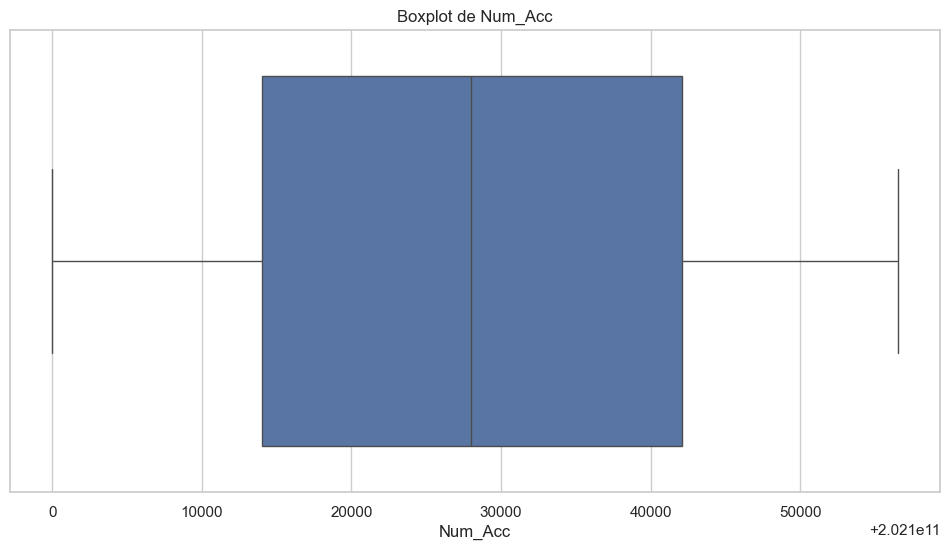

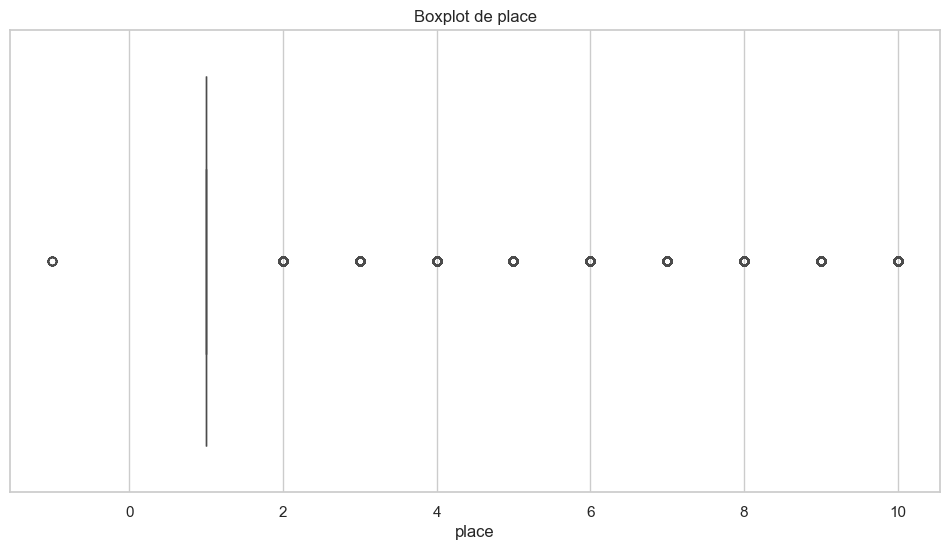

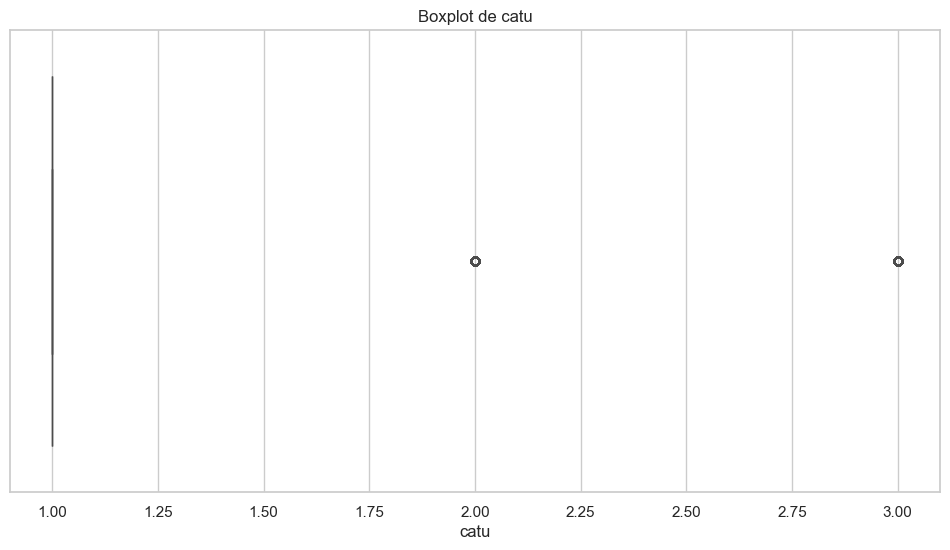

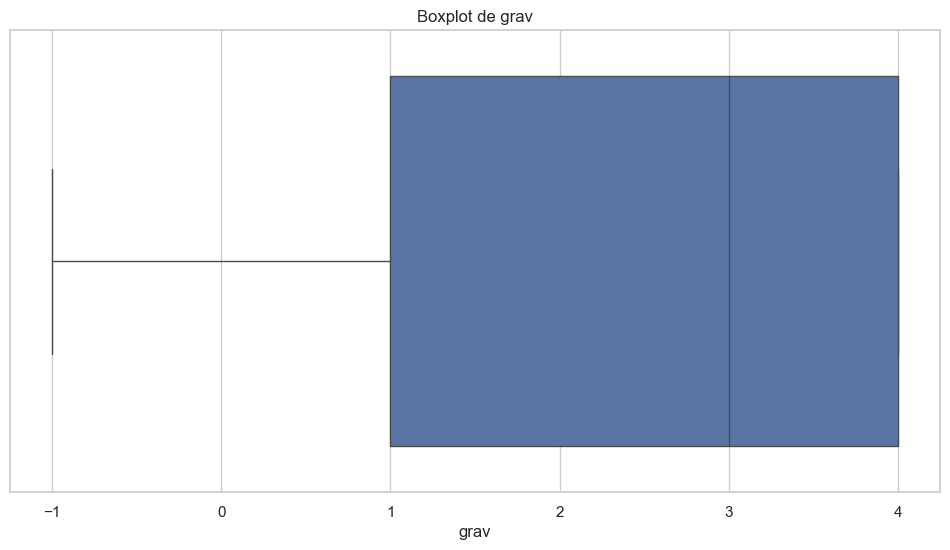

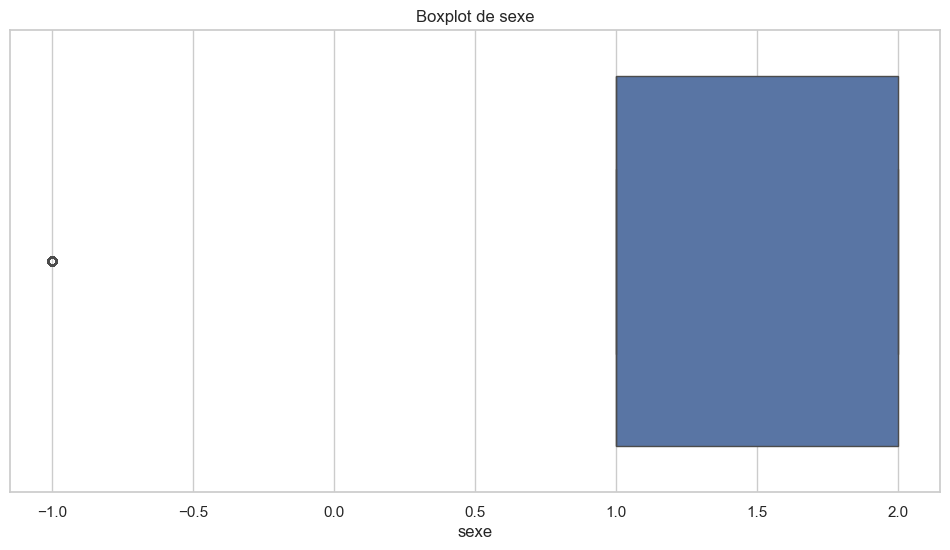

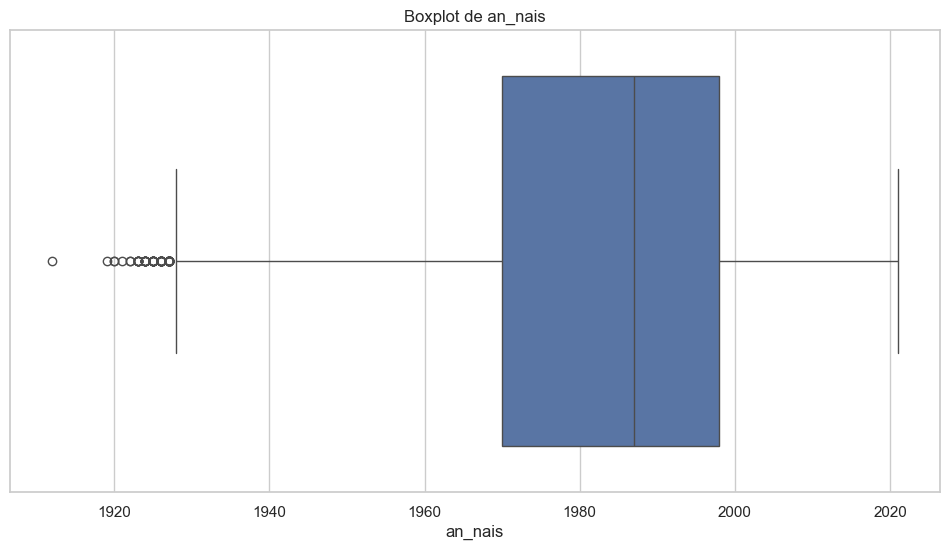

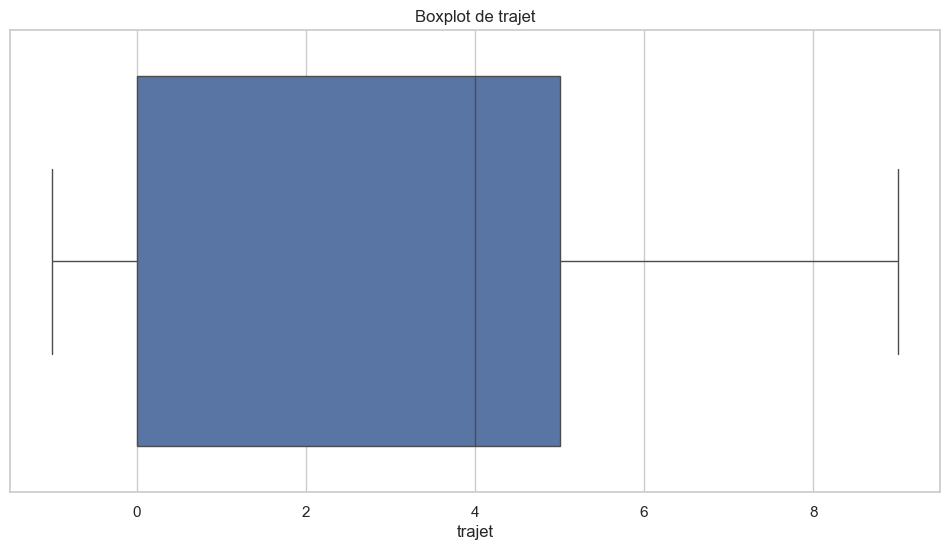

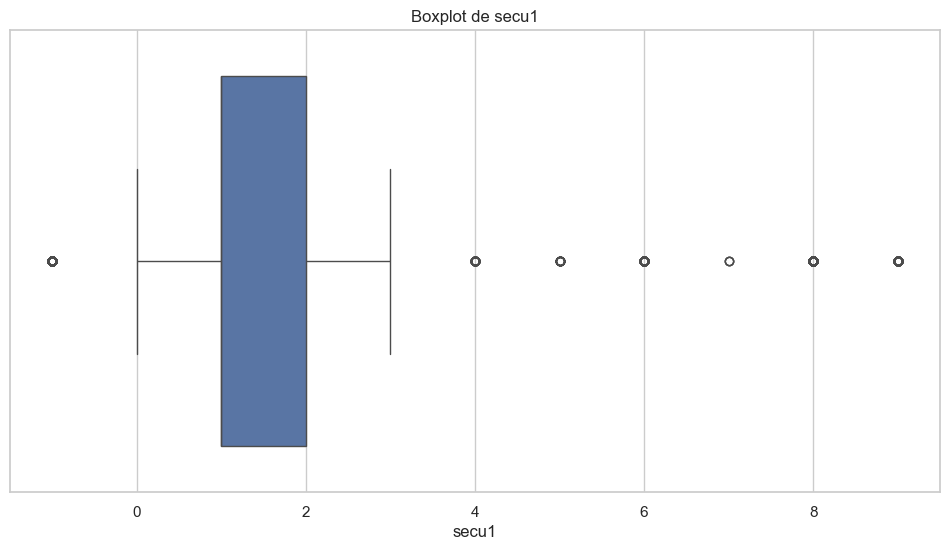

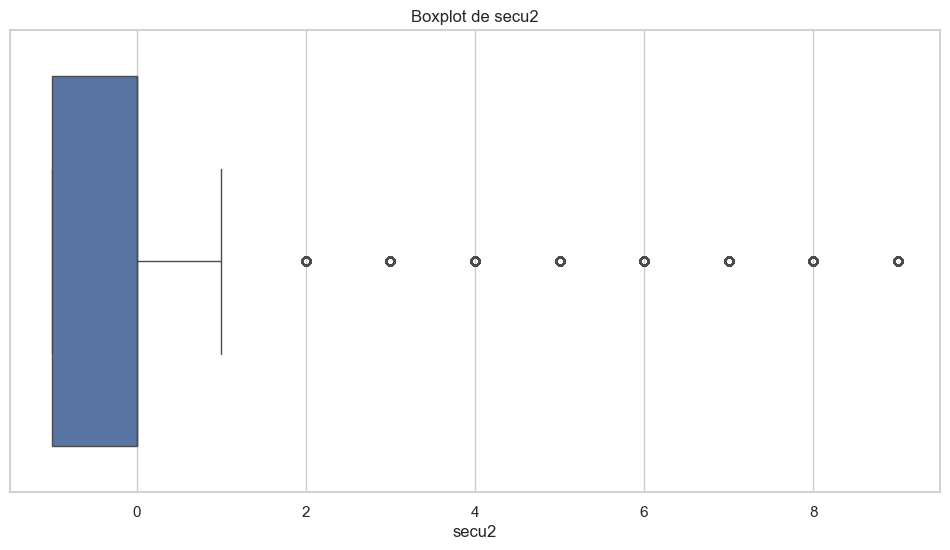

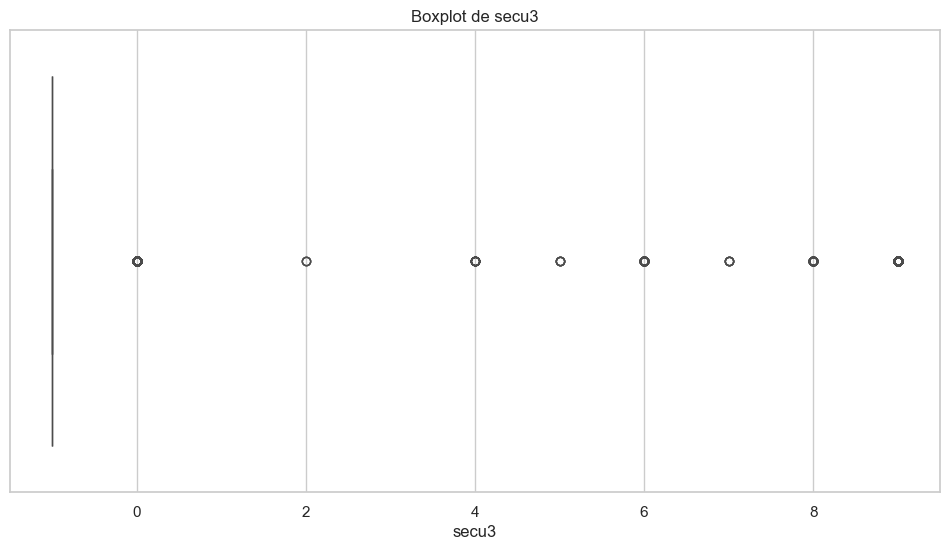

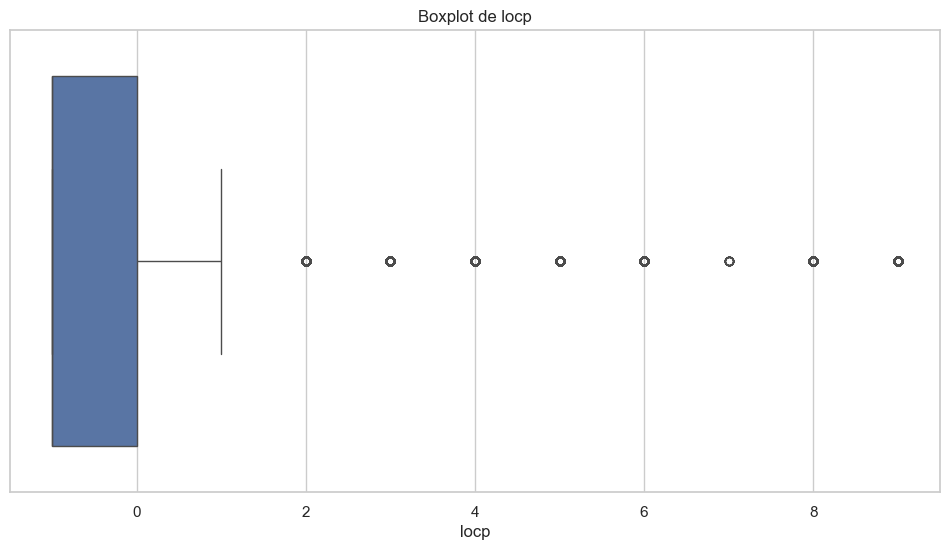

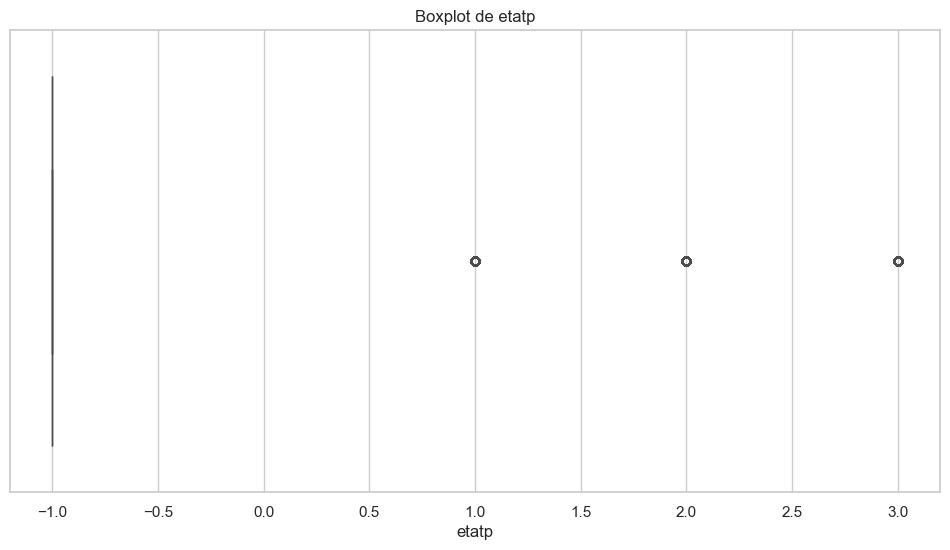

In [8]:
# plot des boxplots pour identifier les valeurs aberrantes dans les colonnes numériques
numeric_columns = usagers_df.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    plt.figure()
    sns.boxplot(x=usagers_df[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

In [9]:
# Calculer les scores Z pour les colonnes numériques pour identifier les valeurs aberrantes
z_scores = np.abs((usagers_df[numeric_columns] - usagers_df[numeric_columns].mean()) / usagers_df[numeric_columns].std())
outliers = (z_scores > 3).sum()
outliers

Num_Acc       0
place      9474
catu          0
grav          0
sexe       3062
an_nais      64
trajet        0
secu1       109
secu2         0
secu3      1083
locp       2981
etatp      9304
dtype: int64

## 7. Visualisation des données

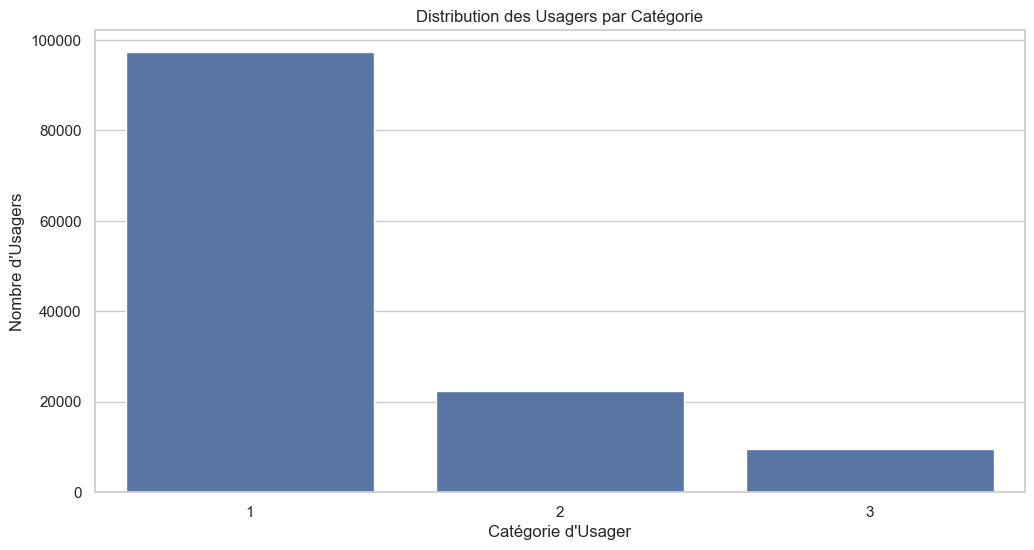

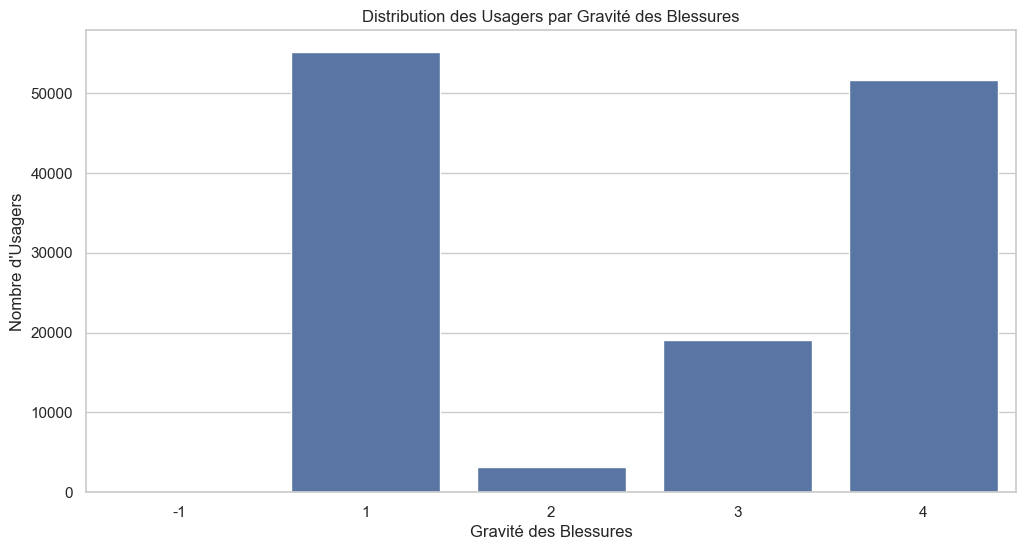

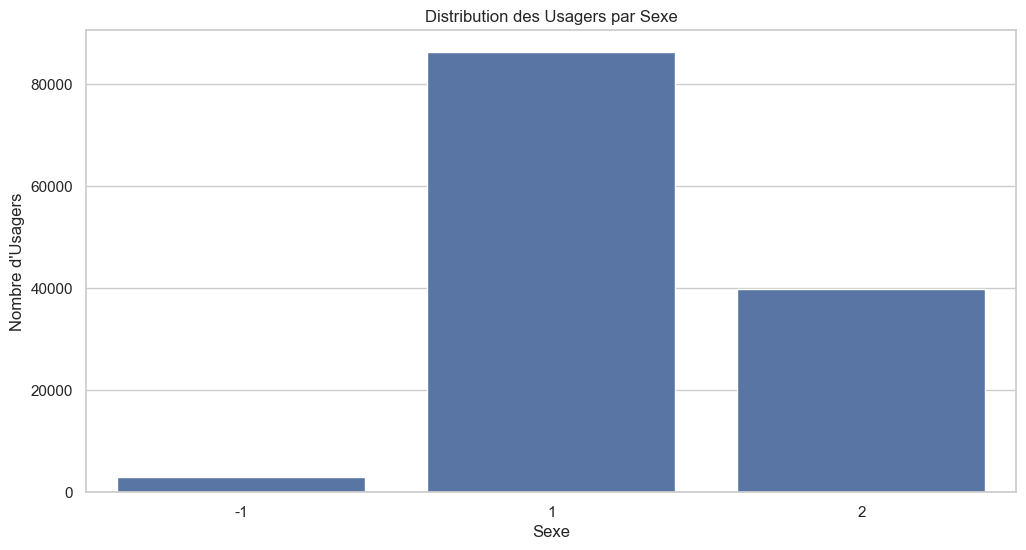

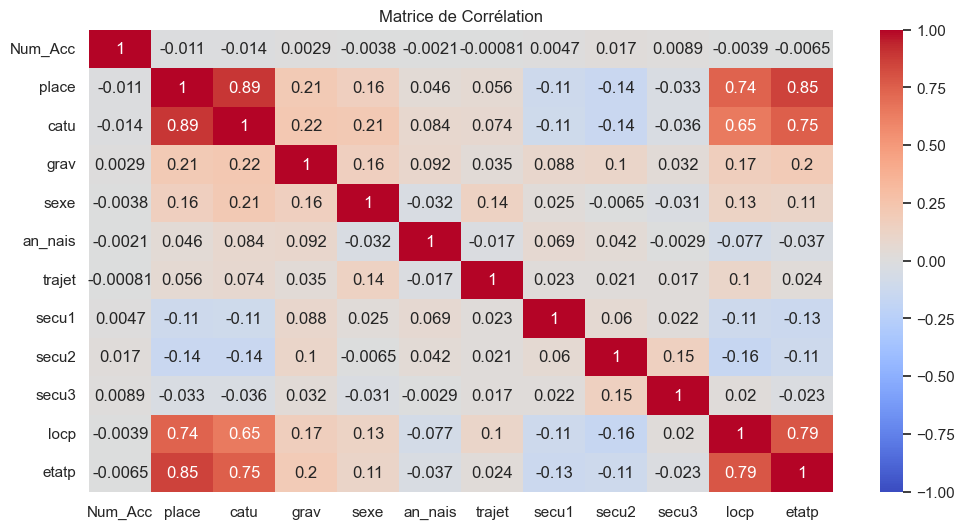

In [10]:
# Distribution des usagers par catégorie (conducteur, passager, piéton)
plt.figure()
sns.countplot(x='catu', data=usagers_df)
plt.title('Distribution des Usagers par Catégorie')
plt.xlabel('Catégorie d\'Usager')
plt.ylabel('Nombre d\'Usagers')
plt.show()

# Distribution des usagers par gravité des blessures
plt.figure()
sns.countplot(x='grav', data=usagers_df)
plt.title('Distribution des Usagers par Gravité des Blessures')
plt.xlabel('Gravité des Blessures')
plt.ylabel('Nombre d\'Usagers')
plt.show()

# Distribution des usagers par sexe
plt.figure()
sns.countplot(x='sexe', data=usagers_df)
plt.title('Distribution des Usagers par Sexe')
plt.xlabel('Sexe')
plt.ylabel('Nombre d\'Usagers')
plt.show()

# Heatmap des corrélations entre les colonnes numériques
plt.figure()
correlation_matrix = usagers_df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de Corrélation')
plt.show()


Distribution des Usagers par Catégorie:

La majorité des usagers sont des conducteurs (catégorie 1).
Les passagers (catégorie 2) et les piétons (catégorie 3) sont moins fréquents.

Distribution des Usagers par Gravité des Blessures:

La majorité des usagers sont indemnes (gravité 1).
Une proportion significative des usagers sont des blessés légers (gravité 4) et des blessés hospitalisés (gravité 3).
Le nombre de décès (gravité 2) est le plus faible.

Distribution des Usagers par Sexe:

Les usagers masculins (sexe 1) sont plus nombreux que les usagers féminins (sexe 2).

Matrice de Corrélation:

Les corrélations entre les colonnes numériques sont généralement faibles, ce qui suggère une indépendance relative entre ces variables.
Quelques corrélations faibles sont observées, par exemple entre sexe et grav ou entre catu et grav.